# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port saint john's
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | olyokminsk
Processing Record 10 of Set 1 | fedorovskiy
Processing Record 11 of Set 1 | tommot
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | ales
Processing Record 15 of Set 1 | harnosand
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | upington
Processing Record 18 of Set 1 | guacimo
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | claveria
Processing Record 22 of Set 1 | olonkinbyen
Processing Reco

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port saint john's,-31.6229,29.5448,20.20,90,100,2.50,ZA,1730667000
1,waitangi,-43.9535,-176.5597,9.90,74,92,3.13,NZ,1730667002
2,constantia,44.1833,28.6500,1.38,37,39,2.03,RO,1730667003
3,talnakh,69.4865,88.3972,-11.29,78,94,4.68,RU,1730667004
4,papatowai,-46.5619,169.4708,10.63,64,100,3.24,NZ,1730667005


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port saint john's,-31.6229,29.5448,20.20,90,100,2.50,ZA,1730667000
1,waitangi,-43.9535,-176.5597,9.90,74,92,3.13,NZ,1730667002
2,constantia,44.1833,28.6500,1.38,37,39,2.03,RO,1730667003
3,talnakh,69.4865,88.3972,-11.29,78,94,4.68,RU,1730667004
4,papatowai,-46.5619,169.4708,10.63,64,100,3.24,NZ,1730667005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

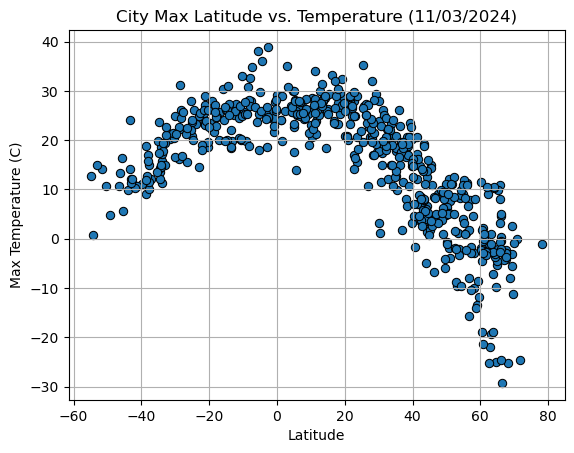

In [39]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor = "black",
            linewidth = 0.75
           )
date = time.strftime("%m/%d/%Y")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

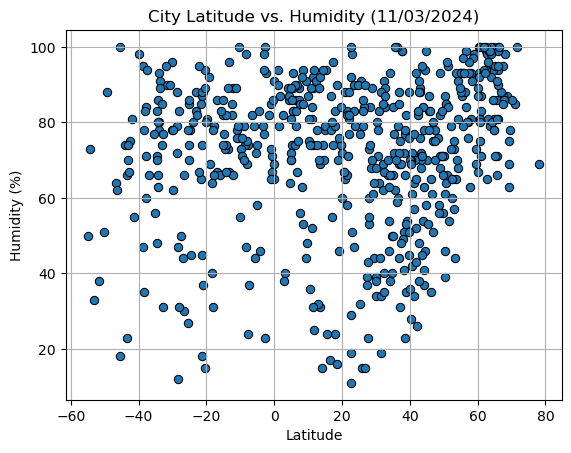

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor = "black",
            linewidth = 0.75
           )
date = time.strftime("%m/%d/%Y")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

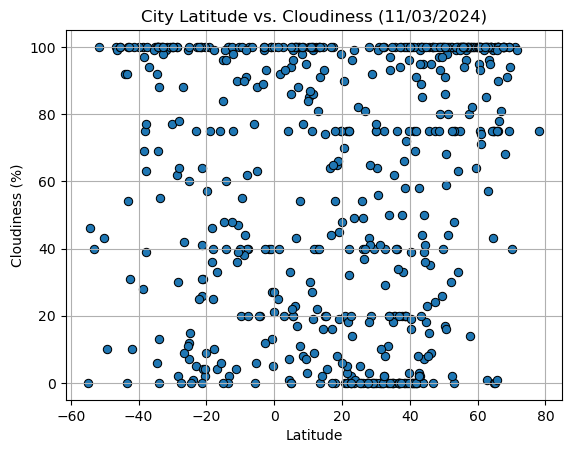

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor = "black",
            linewidth = 0.75
           )
date = time.strftime("%m/%d/%Y")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

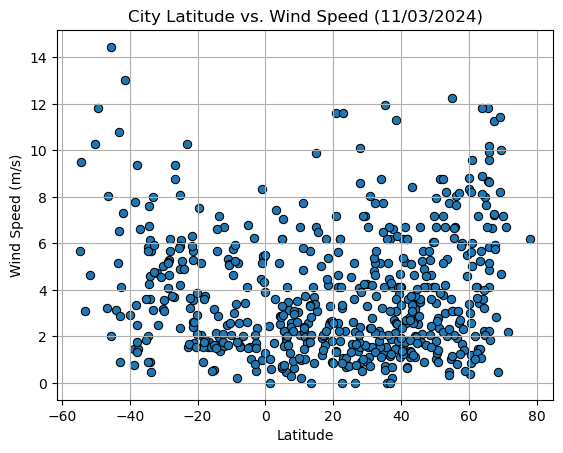

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor = "black",
            linewidth = 0.75
           )
date = time.strftime("%m/%d/%Y")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [120]:
# Define a function to create Linear Regression plots
def create_scatter_plot(title, x, y, xlabel, ylabel):
    plt.scatter(x, y, edgecolor = "black", linewidth = 0.75)

    (slope, intercept, r_value, pvalue, stderr) = linregress(x,y)
    
    m, b = np.polyfit(x, y, 1)
    regression_line = m * x + b
    plt.plot(x, regression_line, color = "red", linewidth = 0.75, 
             label = f'y={m:.2f}x+{b:.2f}, r²={r_value**2:.2f}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,constantia,44.1833,28.6500,1.38,37,39,2.03,RO,1730667003
3,talnakh,69.4865,88.3972,-11.29,78,94,4.68,RU,1730667004
5,yellowknife,62.4560,-114.3525,-1.99,99,100,4.12,CA,1730667006
6,bethel,41.3712,-73.4140,12.05,34,0,2.57,US,1730667008
8,olyokminsk,60.3736,120.4264,-19.00,100,95,0.40,RU,1730667010


In [124]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port saint john's,-31.6229,29.5448,20.20,90,100,2.50,ZA,1730667000
1,waitangi,-43.9535,-176.5597,9.90,74,92,3.13,NZ,1730667002
4,papatowai,-46.5619,169.4708,10.63,64,100,3.24,NZ,1730667005
7,grytviken,-54.2811,-36.5092,0.67,73,46,9.50,GS,1730667009
12,puerto natales,-51.7236,-72.4875,14.25,38,100,4.63,CL,1730667014


###  Temperature vs. Latitude Linear Regression Plot

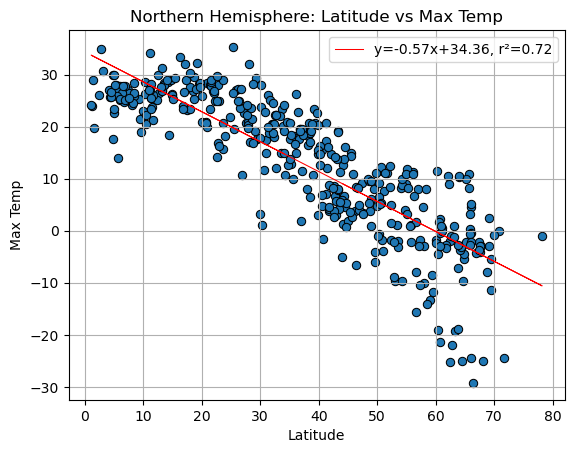

In [127]:
# Linear regression on Northern Hemisphere
create_scatter_plot("Northern Hemisphere: Latitude vs Max Temp",
                    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                    "Latitude", "Max Temp")

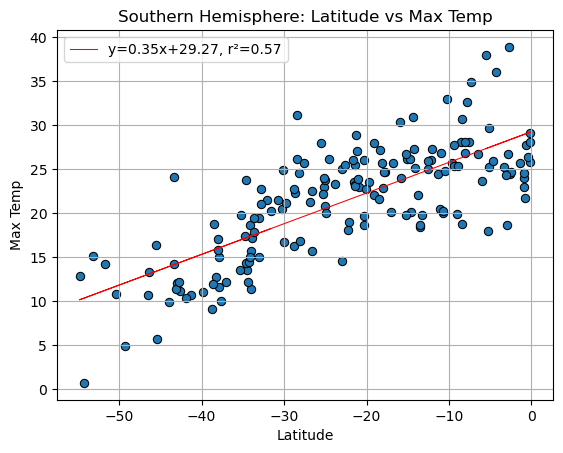

In [129]:
# Linear regression on Southern Hemisphere
create_scatter_plot("Southern Hemisphere: Latitude vs Max Temp",
                    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                    "Latitude", "Max Temp")

**Discussion about the linear relationship:** The graphs seem to indicate a stronger correlation between latitude and max temp in the northern hemisphere compared to the southern hemisphere. Latitude and max temp has a negative correlation in the northern hemisphere and a positive correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

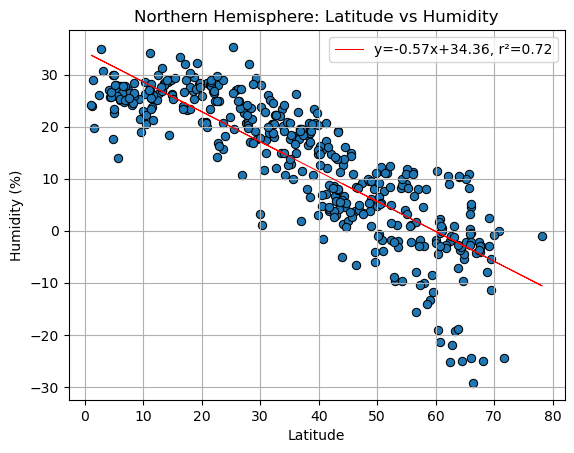

In [131]:
# Northern Hemisphere
create_scatter_plot("Northern Hemisphere: Latitude vs Humidity",
                    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                    "Latitude", "Humidity (%)")

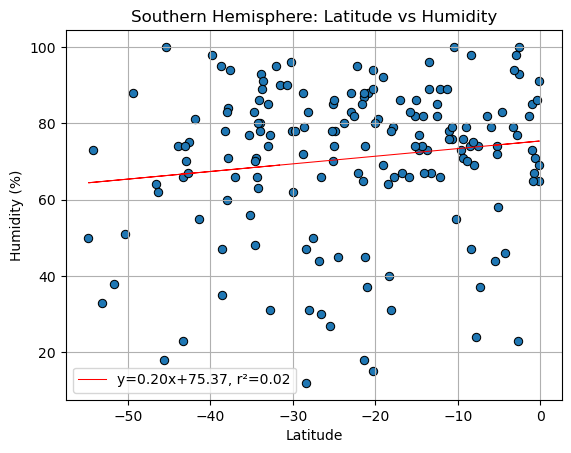

In [133]:
# Southern Hemisphere
create_scatter_plot("Southern Hemisphere: Latitude vs Humidity",
                    southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                    "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** The data seems to indicate a negative correlation between latitude and humidity in the northern hemisphere. The data does not seem to indicate a strong correlation between latitude and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

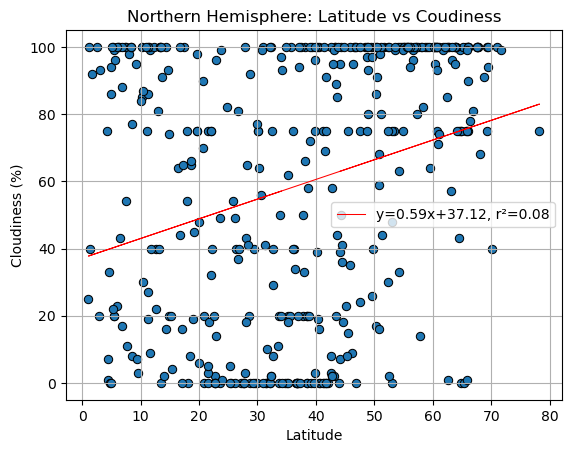

In [137]:
# Northern Hemisphere
create_scatter_plot("Northern Hemisphere: Latitude vs Coudiness",
                    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                    "Latitude", "Cloudiness (%)")

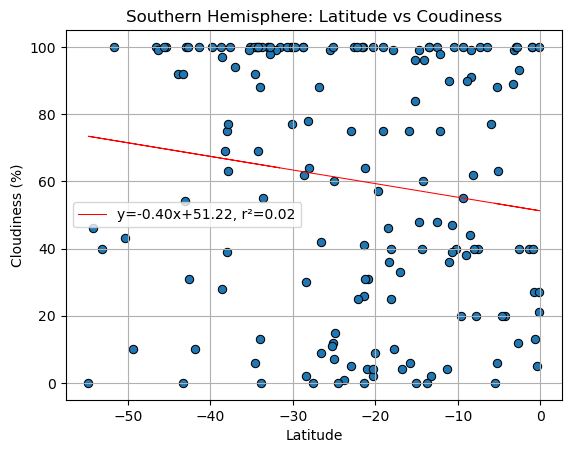

In [139]:
# Southern Hemisphere
create_scatter_plot("Southern Hemisphere: Latitude vs Coudiness",
                    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                    "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** The data does not seem to indicate a strong correlation between latitude and cloudiness for either of the hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

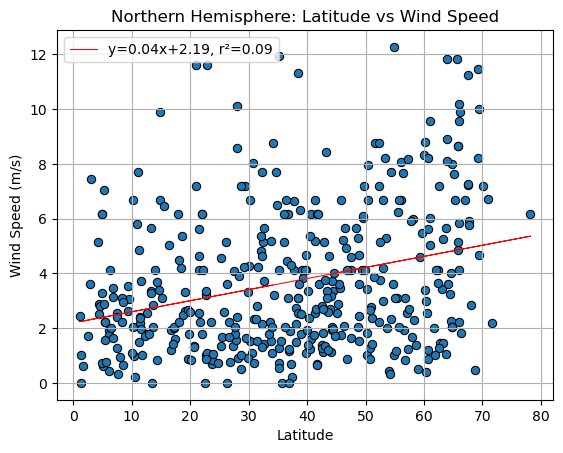

In [141]:
# Northern Hemisphere
create_scatter_plot("Northern Hemisphere: Latitude vs Wind Speed",
                    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                    "Latitude", "Wind Speed (m/s)")

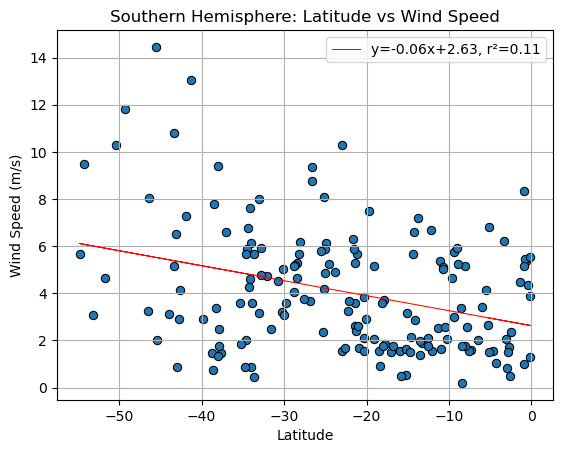

In [143]:
# Southern Hemisphere
create_scatter_plot("Southern Hemisphere: Latitude vs Wind Speed",
                    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                    "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** The data does not seem to indicate a strong correlation between latitude and wind speed in either of the hemispheres.